# SWEDISH ENTREPRENEURSHIP WORD NETS
## I: Sententially Co-Occurring Topic Modeling Terms 

## By Moses Boudourides, Sergios Lenis & Karl Wennberg

In [1]:
import os
import random, operator, re, string, copy, dateutil.parser, itertools, pickle, datetime, math, pandas as pd, numpy as np, matplotlib.pyplot as plt, networkx as nx, community
# import pygraphviz
np.random.seed(2018)
from collections import Counter
# from networkx.drawing.nx_agraph import graphviz_layout
from string import punctuation, digits
import nltk
# nltk.download('wordnet')
from nltk.stem.porter import *
stemmer = PorterStemmer()
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet as wn
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora, models
from gensim.corpora import Dictionary
import pyLDAvis
from pyLDAvis import gensim as pgensim
pyLDAvis.enable_notebook()
import matplotlib.pyplot as plt
import seaborn as sns
import codecs
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.simplefilter('ignore')

### Load Data

In [2]:
filenames = ["data/entrepreneur1995.txt","data/entrepreneur2005.txt","data/entrepreneur2019.txt",
             "data/startup1995.txt","data/startup2005.txt","data/startup2019.txt"]
titlename = "The Swedish Entrepreneurship Data"

F=[]
num_lines = 0
num_words = 0
num_chars = 0
for filename in filenames:
    f = codecs.open(filename, "r", encoding="utf-8").readlines()
#     lline
    for line in f:
        if line.startswith(">"):
            continue
        words = line.split()
        num_lines += 1
        num_words += len(words)
        num_chars += len(line)
print("%s has number of words = %i (and number of characters/symbols = %i)" %(titlename,num_words,num_chars))
# print "%s has number of words = %i" %(titlename,num_words)
# blob = TextBlob("\n".join(f))

The Swedish Entrepreneurship Data has number of words = 459858 (and number of characters/symbols = 3194021)


In [34]:
text=[]
for filename in filenames:
    f = codecs.open(filename, "r", encoding="utf-8").readlines()
    textf="\n".join(f).split("==============================================================================")
    text.append(textf)
for textf in text:
    print(text.index(textf),len(textf),type(textf))

docs_d={}
for i,j in enumerate(text):
    if i==0:
        for ii,jj in enumerate(j):
            docs_d["Entrepreneur1995"+str(ii+1)]=jj
    if i==1:
        for ii,jj in enumerate(j):
            docs_d["Entrepreneur2005"+str(ii+1)]=jj
    if i==2:
        for ii,jj in enumerate(j):
            docs_d["Entrepreneur2019"+str(ii+1)]=jj
    if i==3:
        for ii,jj in enumerate(j):
            docs_d["Startup1995"+str(ii+1)]=jj
    if i==4:
        for ii,jj in enumerate(j):
            docs_d["Startup2005"+str(ii+1)]=jj
    if i==5:
        for ii,jj in enumerate(j):
            docs_d["Startup2019"+str(ii+1)]=jj
print(len(docs_d))
docs=docs_d.values()
print(len(docs))
print("This is the beginning of the first document:")
list(docs)[0][:1000]

0 180 <class 'list'>
1 598 <class 'list'>
2 86 <class 'list'>
3 1 <class 'list'>
4 4 <class 'list'>
5 123 <class 'list'>
992
992
This is the beginning of the first document:


'Handelshögskolan i StockholmBIBSAM\r\n\nUttag 2019-12-20\r\n\n\r\n\nNyheter:\r\n\n\r\n\n> OMBYGGNAD AV ULLEVI FÖRLUST FÖR ENTREPRENÖR, Tidningarnas Telegrambyrå, 1995-05-12 21:02\r\n\n\r\n\n> DONERADE KROPPAR HAMNADE HOS PRIVAT ENTREPRENÖR, Tidningarnas Telegrambyrå, 1995-03-09 16:15\r\n\n\r\n\n> Socialdistrikt prövar fritt val av hemhjälp, Svenska Dagbladet, 1995-04-28\r\n\n\r\n\n> Ambulanssjukvårdare hotar säga upp sig, Svenska Dagbladet, 1995-11-15\r\n\n\r\n\n> Djärv entreprenör prisad, Svenska Dagbladet, 1995-01-24\r\n\n\r\n\n> Kommun stämmer entreprenör, Svenska Dagbladet, 1995-01-12\r\n\n\r\n\n> Samariten kvar som entreprenör, Svenska Dagbladet, 1995-11-22\r\n\n\r\n\n> Edward K-son Bergenstråhle, Svenska Dagbladet, 1995-06-22\r\n\n\r\n\n> Entreprenör miljonär på vård, Dagens Nyheter, 1995-11-23\r\n\n\r\n\n> Carl Gunnar Olson, Svenska Dagbladet, 1995-12-30\r\n\n\r\n\n> Vår teater blir kommunal igen, Svenska Dagbladet, 1995-09-28\r\n\n\r\n\n> Sju milj för vård som inte utförts, Sv

### Extraction of Terms from Topic Modeling

In [4]:
excluded = stopwords.words('swedish') + list(punctuation) 

def tokenize(text):
    words = word_tokenize(text)
    words = [w.lower() for w in words]
    return [w for w in words if w not in excluded and not w.isdigit()] #stop_words
 
vocabulary = set()
for i in docs:
    words = tokenize(i)
    vocabulary.update(words)
 
vocabulary = list(vocabulary)
word_index = {w: idx for idx, w in enumerate(vocabulary)}
 
VOCABULARY_SIZE = len(vocabulary)
DOCUMENTS_COUNT = len(docs)
 
print(VOCABULARY_SIZE, DOCUMENTS_COUNT)  #All: 43062 992

43062 992


In [5]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [6]:
documents=docs
doc_sample = list(documents)[0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['Handelshögskolan', 'i', 'StockholmBIBSAM\r\n\nUttag', '2019-12-20\r\n\n\r\n\nNyheter:\r\n\n\r\n\n>', 'OMBYGGNAD', 'AV', 'ULLEVI', 'FÖRLUST', 'FÖR', 'ENTREPRENÖR,', 'Tidningarnas', 'Telegrambyrå,', '1995-05-12', '21:02\r\n\n\r\n\n>', 'DONERADE', 'KROPPAR', 'HAMNADE', 'HOS', 'PRIVAT', 'ENTREPRENÖR,', 'Tidningarnas', 'Telegrambyrå,', '1995-03-09', '16:15\r\n\n\r\n\n>', 'Socialdistrikt', 'prövar', 'fritt', 'val', 'av', 'hemhjälp,', 'Svenska', 'Dagbladet,', '1995-04-28\r\n\n\r\n\n>', 'Ambulanssjukvårdare', 'hotar', 'säga', 'upp', 'sig,', 'Svenska', 'Dagbladet,', '1995-11-15\r\n\n\r\n\n>', 'Djärv', 'entreprenör', 'prisad,', 'Svenska', 'Dagbladet,', '1995-01-24\r\n\n\r\n\n>', 'Kommun', 'stämmer', 'entreprenör,', 'Svenska', 'Dagbladet,', '1995-01-12\r\n\n\r\n\n>', 'Samariten', 'kvar', 'som', 'entreprenör,', 'Svenska', 'Dagbladet,', '1995-11-22\r\n\n\r\n\n>', 'Edward', 'K-son', 'Bergenstråhle,', 'Svenska', 'Dagbladet,', '1995-06-22\r\n\n\r\n\n>', 'Entreprenör', 'miljonär',

['stockholmbibsam', 'uttag', 'nyhet', 'ombyggnad', 'ullevi', 'förlust', 'entreprenör', 'tidningarna', 'telegrambyrå', 'donerad', 'kroppar', 'hamnad', 'privat', 'entreprenör', 'tidningarna', 'telegrambyrå', 'socialdistrikt', 'prövar', 'fritt', 'hemhjälp', 'svenska', 'dagbladet', 'hotar', 'säga', 'svenska', 'dagbladet', 'djärv', 'entreprenör', 'prisad', 'svenska', 'dagbladet', 'kommun', 'stämmer', 'entreprenör', 'svenska', 'dagbladet', 'samariten', 'kvar', 'entreprenör', 'svenska', 'dagbladet', 'edward', 'bergenstråhl', 'svenska', 'dagbladet', 'entreprenör', 'miljonär', 'vård', 'dagen', 'nyhet', 'carl', 'gunnar', 'olson', 'svenska', 'dagbladet', 'teater', 'blir', 'kommun', 'igen', 'svenska', 'dagbladet', 'milj', 'vård', 'int', 'utfört', 'svenska', 'dagbladet', 'entreprenör', 'ökad', 'drivkraft', 'svenska', 'dagbladet', 'byggstart', 'dubbelspår', 'tidningarna', 'telegrambyrå', 'privatis', 'ingen', 'valfrihet', 'tidningarna', 'telegrambyrå', 'peab', 'bygger', 'vallsundsbron', 'miljon', 'kr

In [7]:
rd={}
# {u"kenni":u"kenny",u"kennedi":u"kennedy",u"jewelri":u"jewelry",u"dolli":u"dolly",u"jerri":u"jerry",
#     u"scari":u"scary",u"academi":u"academi",u"societi":u"society",u"sothebi":u"sotheby",u"beverli":u"beverly",u"lobbi":u"lobby"}

pdocs=[preprocess(doc) for doc in documents]

ppdocs=[]
for s in pdocs:
    for i in range(len(s)):
        for k in rd.keys():  #,v in rd.items():
            if k == s[i]:
                s[i]=rd[k]
    ppdocs.append(s)

# for s in ppdocs:
#     for i in range(len(s)):
#         for k,v in rd.items():
#             if k == s[i]:
#                 print k

In [8]:
# processed_docs = [preprocess(doc) for doc in documents]
# processed_docs[:10]

excl=[u"stor",u"utgivar",u"retriev",u"dagbladet",u"fram",u"hela",u"efter",u"annat",u"vara",u"namn",
      u"sida",u"artikeln",u"allt",u"nyhet",u"print",u"publicerat",u"http",u"dagen",u"info",u"finn",
      u"vill",u"kommer",u"enligt",u"andra",u"ocks",u"samma",u"sedan",u"sektion",u"hade",u"egna",
      u"fredric",u"bara",u"mycket",u"fler",u"bildtext",u"blir",u"enskild",u"skull",u"lite",u"bland",
      u"person",u"utgivaren",u"peter",u"sitt",u"expressen",u"stora",u"sydsvenskan",u"genom",
      u"aftonbladet",u"uten",u"mellan",u"bonnier",u"familj",u"sina",u"kansk",u"fick",u"blev",
      u"talet",u"tidigar",u"flera",u"helt",u"varit",u"inom",u"henn",u"detta",u"kunna",u"mest",
      u"wolodarski",u"olika",u"olsson",u"gjord",u"rehnquist",u"redan",u"varj",u"tror",u"vilket",
      u"maria",u"sofia",u"inget",u"eftersom",u"aldrig",u"fyra",u"senar",u"samtidigt",u"tycker",
      u"karn",
     u"ver",u"ren",u"int",u"till",u"ret",u"han",u"ven",u"dag",u"kla",u"str",u"eller",u"utan",u"gra",
      u"fre",u"igen",u"ocks",u"samt",u"slut",u"dera",u"vidar",u"plat",u"lika",u"visa",u"ander",u"erik",
      u"fall",u"innan",u"exempel",u"johan",u"gick",u"komma",u"mitt",u"bort",u"kring",u"hitta",u"delar",
      u"ofta",u"nsta",u"handlar",u"alltid",u"gjort",u"skriver",u"trot",u"runt",u"senast",u"honom",
      u"ligger",u"minst",u"skall",u"blivit",u"dessutom",u"annan",u"nnu",u"dock",u"tillbaka",u"visar",
      u"menar",u"karn",u"mindr",u"denna",u"drygt",u"ditt",u"cirka",u"riktigt",u"finna",u"haft",u"sista",
      u"karén",u"alla",u"från",u"något",u"särskilt",u"följer",
      u"säger",u"över",u"även",u"också",u"utanför" 
]

# starts with u"..."
processed_docs = ppdocs #[preprocess(doc) for doc in documents]
processed_docs1=[]
for x in processed_docs:
    y=[]
    for xx in x:
        if xx not in excl:
            y.append(xx)
    processed_docs1.append(y)
processed_docs=processed_docs1
allw=[]
for x in processed_docs:
    for xx in x:
        if xx not in allw:
            allw.append(xx)
print(len(allw)) #All 32501
# processed_docs[:10]

32349


In [9]:
allws=[]
for z in processed_docs:
    for zz in z:
        allws.append(zz)
print(len(allws),len(set(allws)))
# sorted(allws)
allwd=Counter(allws)
print(len(allwd))
# for p,q in allwd.items():
#     print(p,q)
# count = 0
# for k in sorted(allwd.keys()):
#     print(k)
#     count += 1
#     if count > 50:
#         break

200370 32349
32349


In [10]:
dictionary = gensim.corpora.Dictionary(processed_docs)
print(len(dictionary)) #All 32368
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

32349
0 abba
1 acceptera
2 ackordslön
3 affär
4 affärsman
5 alternativ
6 ambulansbojkott
7 amerikansk
8 anali
9 anbud
10 anbuden


In [11]:
dictionary.filter_extremes(no_below=2, no_above=2, keep_n=300)
#                            keep_n=100000) #3 0.7 | 15 0.5
len(dictionary) #All 15838 [2: 10955 with keep_n=100000]

300

In [12]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
# bow_corpus[43]

In [13]:
nt=4 #number_of_topics
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=nt, id2word=dictionary, passes=2, workers=2)

In [14]:
topics = lda_model.print_topics(num_words=100) #350

terms=[]
lt=[]
for i in range(nt):
    for t in topics: 
        lt.append(t[1].split(" + "))
import re
for s in lt:
    for ss in s:
        terms.append(ss[6:])
#         if re.sub(r'[^a-zA-Z]','', ss) not in terms:
#             terms.append(re.sub(r'[^a-zA-Z]','', ss))
terms=[t.replace('"',"") for t in terms]
terms=sorted(set(terms))
print(len(terms))
print(" ")
print("LIST OF TM TERMS:")
print(" ")
for i in terms:
    print(i)

177
 
LIST OF TM TERMS:
 
alltså
amerikanska
anna
anställda
antal
artiklar
avtalslicen
bakom
barn
behöver
berättar
beskriv
björn
bolag
bolaget
bord
bygga
bästa
bättre
både
började
början
börjar
carl
chef
databasen
dess
distribuera
driver
därför
egen
eget
ekonomi
enda
energi
enkelt
entreprenör
entreprenören
europa
fakta
familjen
fann
favorit
folk
fortfarand
framför
framtiden
fått
företag
företaget
författar
förra
först
första
gamla
gener
godkännand
gott
granström
grundar
gälland
gäller
gång
gången
gånger
gått
göra
göteborg
hand
hoppa
håller
ihop
industri
inför
ingen
ingår
intress
investerar
kina
kommun
kopiera
kronor
kultur
kund
kvar
kvinnor
känd
känna
känner
landet
livet
lycka
länge
längre
långt
marknaden
medan
medgivand
medier
medium
miljard
miljon
minska
människor
många
måste
möjlighet
nyhetsbyrån
nytt
nära
näringsliv
nästa
nästan
någon
några
olsén
ordförand
organisationen
pengar
pengarna
politik
politiska
preci
privata
problem
procent
produkt
program
rätt
saker
samtliga
satt
själv
s

In [15]:
sss=[]
for idx, topic in lda_model.print_topics(-1):
    tt=[]
    s=topic.split(" + ")
    ss=[]
    uu=[]
    for t in s:
        u0=float(t.split("*")[0])
        u1=t.split("*")[1].replace('"','')
        if (u1,u0) not in ss:
            ss.append((u1,u0))
        if t not in uu:
            uu.append(t) 
    sss.append(ss)
    topic=" + ".join(uu).encode('utf-8')
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: b'0.095*"artiklar" + 0.048*"skyddad" + 0.046*"databasen" + 0.043*"g\xc3\xa4lland" + 0.043*"\xc3\xb6verf\xc3\xb6ra" + 0.043*"kopiera" + 0.043*"medium" + 0.043*"avtalslicen" + 0.042*"\xc3\xb6vers\xc3\xa4tta" + 0.042*"medgivand"'
Topic: 1 
Words: b'0.035*"artiklar" + 0.028*"svenska" + 0.018*"entrepren\xc3\xb6r" + 0.017*"godk\xc3\xa4nnand" + 0.017*"skyddad" + 0.016*"distribuera" + 0.016*"m\xc3\xa5nga" + 0.016*"organisationen" + 0.014*"databasen" + 0.012*"stockholm"'
Topic: 2 
Words: b'0.019*"m\xc3\xa5nga" + 0.017*"sverig" + 0.014*"f\xc3\xb6rsta" + 0.014*"svenska" + 0.014*"artiklar" + 0.013*"g\xc3\xb6ra" + 0.013*"m\xc3\xa4nniskor" + 0.012*"b\xc3\xa5de" + 0.012*"stockholm" + 0.011*"sj\xc3\xa4lv"'
Topic: 3 
Words: b'0.079*"svenska" + 0.034*"artiklar" + 0.028*"entrepren\xc3\xb6r" + 0.024*"sverig" + 0.017*"skyddad" + 0.017*"kronor" + 0.017*"organisationen" + 0.017*"distribuera" + 0.016*"framtiden" + 0.016*"godk\xc3\xa4nnand"'


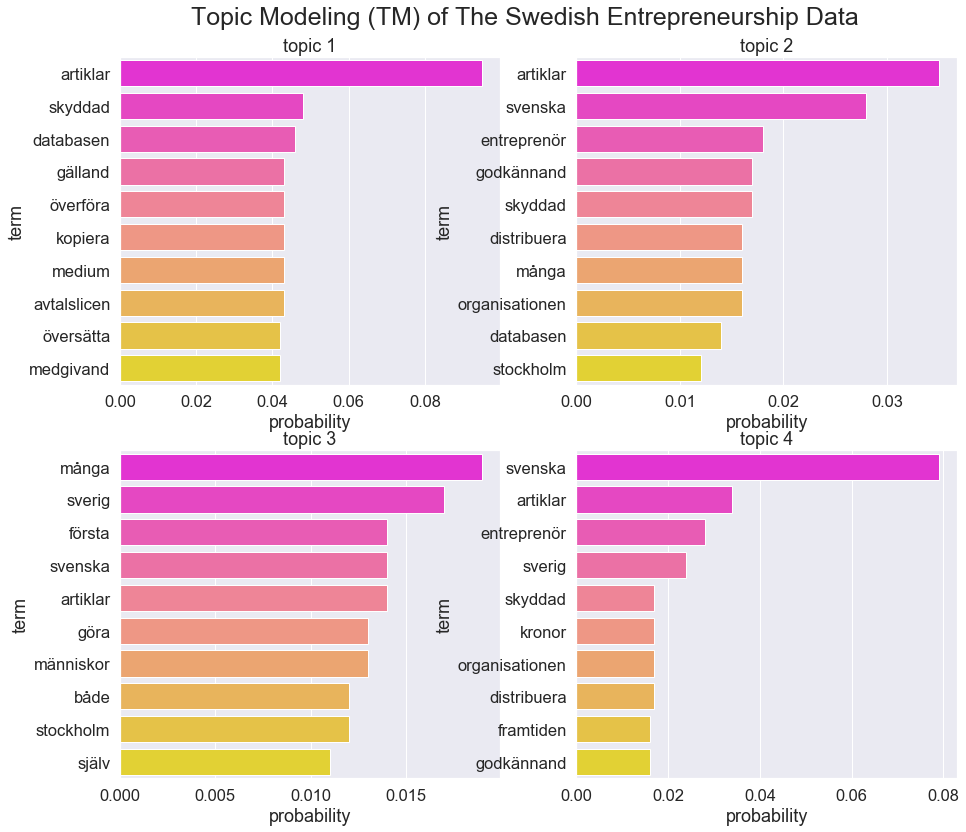

In [16]:
plt.figure(figsize=(15,35)) #figsize=(15,2.4*15*((nt+1)/4))); #15
for i in range(nt):
    sns.set(font_scale = 1.5)
    df=pd.DataFrame(sss[i], columns=['term','prob']).set_index('term')
    plt.subplot(nt+1,2,i+1); #5
    plt.title('topic '+str(i+1));
    sns.barplot(x='prob', y=df.index, data=df, label='Cities', palette='spring');
    plt.xlabel('probability');
sst="Topic Modeling (TM) of %s" %titlename
plt.suptitle(sst,fontsize=25, y=0.90);
plt.show()

In [17]:
from pyLDAvis import gensim as pgensim
vis = pgensim.prepare(lda_model,bow_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.071659  0.030821       1        1  34.845631
3      0.037894 -0.042071       2        1  31.942522
1      0.029001  0.005636       3        1  19.630518
0     -0.138554  0.005614       4        1  13.581332, topic_info=    Category         Freq            Term        Total  loglift  logprob
1    Default  1678.000000        artiklar  1678.000000  30.0000  30.0000
141  Default   293.000000        överföra   293.000000  29.0000  29.0000
140  Default   292.000000          medium   292.000000  28.0000  28.0000
138  Default   294.000000         kopiera   294.000000  27.0000  27.0000
137  Default   291.000000     avtalslicen   291.000000  26.0000  26.0000
..       ...          ...             ...          ...      ...      ...
40    Topic4    30.005280  organisationen   581.866333  -0.9684  -5.3726
21    Topic4    29.370319      godkännand   546.777588  -0.9276  -5.3940
63    Topic4    27.539717            göra   473.405701  -0.8478  -5.4583
35    Topic4    25.439915          miljon   397.295502  -0.7519  -5.5376
8     Topic4    25.442942     distribuera   552.462280  -1.0815  -5.5375

[240 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
268       1  0.479516       anna
268       2  0.281095       anna
268       3  0.090943       anna
268       4  0.148815       anna
81        1  0.282956      anser
...     ...       ...        ...
141       4  0.942936   överföra
142       1  0.003428  översätta
142       2  0.013714  översätta
142       3  0.041141  översätta
142       4  0.939381  översätta

[584 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 1])

In [18]:
ted={}
for k,v in docs_d.items():
    t=[]
    for w in terms: 
        if w in v:
            if w not in t:
                t.append(w)
    ted[k]=sorted(t)
print(len(ted))
# for k,v in ted.items():
#     print k,v

992


In [19]:
freq=[]
for k in terms: 
    for kk,v in allwd.items():
        if kk==k:
            freq.append(v)
trf_df = pd.DataFrame(
    {'Term': terms, 
     'Frequency of Occurrences': freq
    })
trf_df=trf_df[['Term','Frequency of Occurrences']]
trf_df=trf_df.sort_values(by ='Frequency of Occurrences',ascending=False)
trf_df=trf_df[trf_df["Frequency of Occurrences"]>100]
print(len(trf_df))
trf_df

146


,Term,Frequency of Occurrences
5,artiklar,1999
149,svenska,1772
136,skyddad,996
25,databasen,867
36,entreprenör,854
...,...,...
38,europa,104
98,medier,104
24,chef,103
68,hand,102


In [20]:
trf_df.to_csv('terms_freqs.csv')

In [21]:
tterms=sorted(set(terms+trf_df['Term'].tolist()[:70]))
print(len(tterms))
print(tterms==terms)
# print
# print "LIST OF TM TERMS"
# print
# for i in sorted(tterms):
#     print i

177
True


In [22]:
# tterms = [
# ]

### The graph of co-occurrent TM terms

In [23]:
medges=[]
for k,v in docs_d.items():
    sent_text = nltk.sent_tokenize(v)
    for sent in sent_text:
        for j in itertools.combinations(tterms, 2):
            if j[0] in sent and j[1] in sent:
                medges.append((j[0],j[1],k))
print(len(medges),len(set(medges)))
# medges

88349 81913


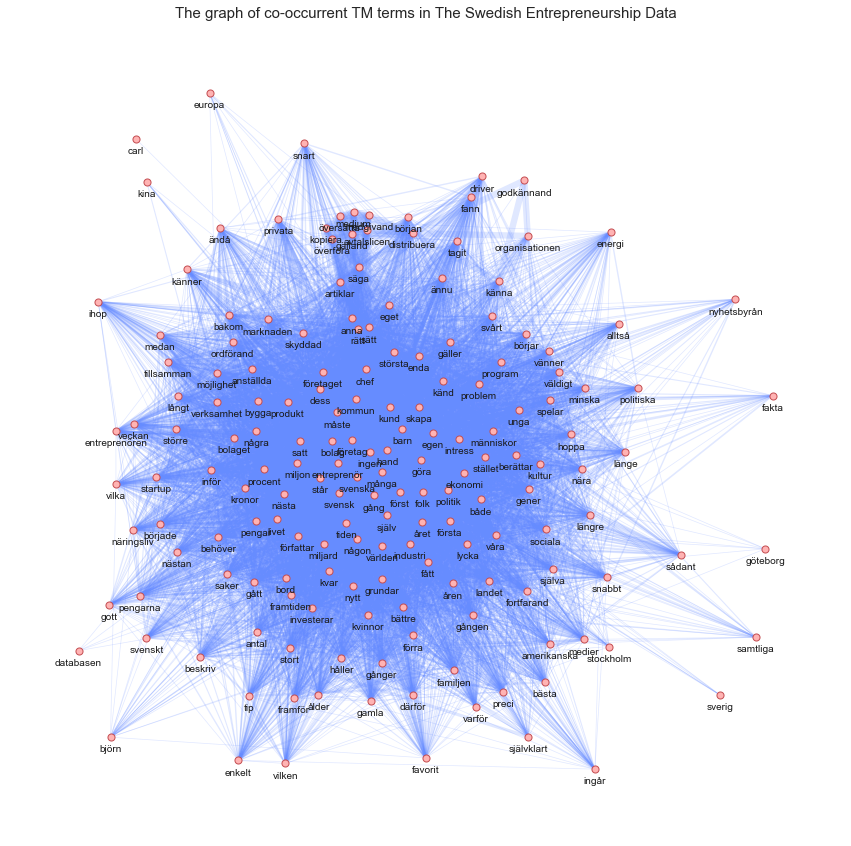

In [24]:
G = nx.MultiGraph()
G.add_edges_from(medges)
weight={(x,y):v for (x, y), v in Counter(G.edges()).items()}
w_edges=[(x,y,z) for (x,y),z in weight.items()]
Gw = nx.Graph()
Gw.add_weighted_edges_from(w_edges)

edge_width=[Gw[u][v]['weight'] for u,v in Gw.edges()]
# elabels = nx.get_edge_attributes(Gw,'weight')
edge_width=[math.log(1+w) for w in edge_width]
# [3*w for w in edge_width] 

figsize=(15,15)
pos=nx.spring_layout(Gw,k=2.5) #graphviz_layout(Gw) 
node_color="#ffb3b3"
node_border_color="r"
edge_color="#668cff"
G=Gw
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color,node_size=50)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color,width=edge_width,alpha=0.2)
# nx.draw_networkx_labels(G, pos)
# nx.draw_networkx_edge_labels(G,pos,edge_labels=elabels);
plt.axis('off');
yoffset = {}
y_off = -0.03 #0.05  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G, yoffset,font_size=10);
sst="The graph of co-occurrent TM terms in %s" %titlename
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 

In [25]:
print(len(G),len(G.edges()))

175 9066


### Clustering keywords as communities of the co-occurrence graph

In [26]:
G=Gw

partition = community.best_partition(G)
# print partition

kk=len(set(partition.values()))
modularity=community.modularity(partition, G, weight='weight')
print('The graph has', kk, 'communities and modularity coefficient equal to', modularity)
print(" ")

cml=[]
for j in range(kk):
    cj=[]
    for k,v in partition.items():
        if v==j:
            cj.append(k)
    cml.append(cj)
cmd={}
for j in range(kk):
    cmd[tuple(cml[j])]=len(cml[j])
cmd
# ocmd=sorted(cmd.iteritems(), key=operator.itemgetter(1), reverse=True)
ocmd=sorted(cmd.items(), key=operator.itemgetter(1), reverse=True)
eocmd=enumerate(ocmd)
commsd={}
louvain_comm_membership={}
for i in eocmd:
    print('Community', i[0], 'with', i[1][1], 'nodes:', list(i[1][0]),"\n")
    commsd[i[0]]=i[1][1] 
    ts=list(i[1][0])
    louvain_comm_membership[i[0]]=ts 

The graph has 3 communities and modularity coefficient equal to 0.4394819036082919
 
Community 0 with 158 nodes: ['entreprenör', 'ingen', 'kommun', 'kvar', 'miljon', 'först', 'första', 'skapa', 'entreprenören', 'inför', 'kronor', 'nytt', 'tiden', 'privata', 'hand', 'nästa', 'nästan', 'länge', 'företag', 'gång', 'företaget', 'många', 'våra', 'industri', 'dess', 'fått', 'gått', 'håller', 'pengar', 'pengarna', 'gäller', 'vilka', 'driver', 'landet', 'kund', 'ihop', 'möjlighet', 'enkelt', 'fortfarand', 'procent', 'måste', 'investerar', 'bakom', 'själv', 'förra', 'året', 'svensk', 'svenska', 'behöver', 'minska', 'ekonomi', 'varför', 'lycka', 'bord', 'spelar', 'känner', 'politik', 'stort', 'därför', 'livet', 'nära', 'näringsliv', 'författar', 'bygga', 'enda', 'står', 'stället', 'framför', 'ordförand', 'stockholm', 'bolag', 'bolaget', 'sådant', 'verksamhet', 'anställda', 'större', 'veckan', 'chef', 'samtliga', 'både', 'tip', 'känd', 'början', 'världen', 'några', 'göra', 'gener', 'egen', 'unga'

In [27]:
pos0=nx.circular_layout(nx.cycle_graph(4))

# ocmd=sorted(cmd.iteritems(), key=operator.itemgetter(1), reverse=True)
ocmd=sorted(cmd.items(), key=operator.itemgetter(1), reverse=True)
eocmd=enumerate(ocmd)
for p,q in list(eocmd):
    if p==0:
        c1=list(list(q)[0])
    if p==1:
        c2=list(list(q)[0])
    if p==2:
        c3=list(list(q)[0])
#     if p==3:
#         c4=list(list(q)[0])

G1=Gw.subgraph(c1)
pos1=nx.circular_layout(G1) #.spring_layout(G1,1.)

G2=Gw.subgraph(c2)
pos2=nx.circular_layout(G2) #.spring_layout(G2,1.)

G3=Gw.subgraph(c3)
pos3=nx.circular_layout(G3) #.spring_layout(G3,1.)

# G4=Gw.subgraph(c4)
# pos4=nx.circular_layout(G4) #.spring_layout(G4,1.)

# GR=G.subgraph(npR)
# posR=nx.spring_layout(GR,1.)

def re_pos(pos,centre,radius):
    plist=[list(v) for v in pos.values()]
    nplist=[v for v in pos.values()]
    x = [p[0] for p in plist]
    y = [p[1] for p in plist]
    centroid = (sum(x) / float(len(plist)), sum(y) / float(len(plist)))
    ncentroid=np.array(centroid)
    rad=max([np.linalg.norm(nplist[i]-ncentroid) for i in range(len(nplist))])
    rpos={}
    for k,v in pos.items():
        rpos[k]=[(v[0]+centre[0])/float(radius),(v[1]+centre[1])/float(radius)]
    return rpos

centers=pos0.values()
centerm=[]
for i in range(len(centers)):
    t=[]
    for j in list(centers)[i]:
        t.append(3*j)  
    centerm.append(np.array(t))
centers=centerm

radius=2. #1.5
pos1=re_pos(pos1,centers[0],0.5)  
pos2=re_pos(pos2,centers[1],radius)    
pos3=re_pos(pos3,centers[2],radius) 
# pos4=re_pos(pos4,centers[3],radius)
# posR=re_pos(posR,centers[4],radius)

# posAll=dict(pos1.items()+pos2.items()+[(k,pos1[k]+pos2[k]) for k in set(pos2)&set(pos1)])
# posAll=dict(pos1.items()+pos2.items()+pos3.items()+[(k,pos1[k]+pos2[k]+pos3[k]) for k in set(pos3)&set(pos2)&set(pos1)])
posAll=dict(list(pos1.items())+list(pos2.items())+list(pos3.items())+[(k,pos1[k]+pos2[k]+pos3[k]) for k in set(pos3)&set(pos2)&set(pos1)])
# posAll=dict(pos1.items()+pos2.items()+pos3.items()+pos4.items()+[(k,pos1[k]+pos2[k]+pos3[k]+pos4[k]) for k in set(pos4)&set(pos3)&set(pos2)&set(pos1)])
# posAll=dict(pos1.items()+pos2.items()+pos3.items()+pos4.items()+posR.items()+[(k,pos1[k]+pos2[k]+pos3[k]+pos4[k]+posR[k]) for k in set(posR)&set(pos4)&set(pos3)&set(pos2)&set(pos1)])

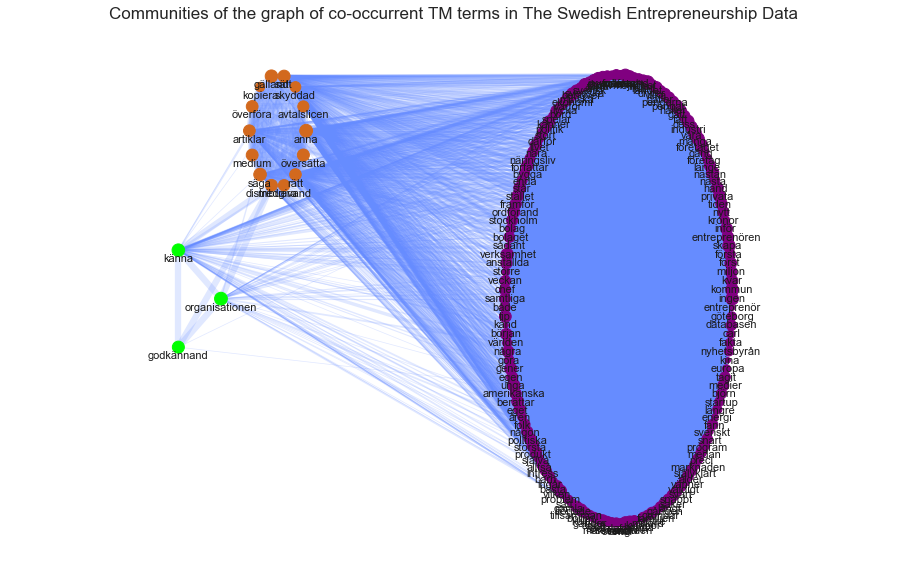

In [28]:
plt.figure(figsize=(16,10))

# pos2['Seven Wonders of the Invisible World']=(-1.4,1.4)
# posAll['Seven Wonders of the Invisible World']=(-1.4,1.4)

# labels={}
# for i in CGwi.nodes():
#     labels[i]=i #''

nsi=[Gw.degree(n) for n in Gw.nodes()]
# nodes = nx.draw_networkx_nodes(CGwi, pos, node_color=node_color,node_size=nsi,node_shape="s")
nx.draw_networkx_nodes(G1,pos=pos1,node_size=nsi,nodelist=c1,node_color='purple',alpha=1.);
nx.draw_networkx_nodes(G2,pos=pos2,node_size=nsi,nodelist=c2,node_color='chocolate',alpha=1.);
nx.draw_networkx_nodes(G3,pos=pos3,node_size=nsi,nodelist=c3,node_color='lime',alpha=1.);
# nx.draw_networkx_nodes(G4,pos=pos4,node_size=nsi,nodelist=c4,node_color='red',alpha=1.);
# nx.draw_networkx_nodes(GR,pos=posR,node_size=node_size,nodelist=npR,node_color='yellow',alpha=1.);
# nx.draw_networkx_nodes(G12,pos=pos12,node_size=dict(G.in_degree()).values(),nodelist=np12,node_color='orange',alpha=1.);
# nx.draw_networkx_nodes(G13,pos=pos13,node_size=dict(G.in_degree()).values(),nodelist=np13,node_color='violet',alpha=1.);
# nx.draw_networkx_nodes(G23,pos=pos23,node_size=node_size,nodelist=np23,node_color='crimson',alpha=1.);    
# nx.draw_networkx_nodes(G123,pos=pos123,node_size=150,nodelist=np123,node_color='yellow',alpha=1.);    
# nx.draw_networkx_nodes(G7,pos=pos7,node_size=500,nodelist=cmms[7],node_color=ppartition7.values(),font_size=20,alpha=1.);

nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(Gw, posAll, edge_color=edge_color,width=edge_width,alpha=0.2)
# nx.draw_networkx_labels(CGwi,posAll,labels=labels,font_size=13); 

# nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth,alpha=0.2);
# nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=25);



plt.axis('off');
yoffset = {}
y_off = -0.08 # offset on the y axis
for k, v in posAll.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Gw, yoffset, font_size=11);
sst="Communities of the graph of co-occurrent TM terms in %s" %titlename 
plt.title(sst,fontsize=17);
plt.margins(x=0.3, y=0.1) 